# Tristan Breetz - Term Project

## Deep Fake generation using an auto-encoder with discriminator

Use autoencoder to reduce input image to latent space and then resolve latent space back to output image.
Then, using a discriminator network, calculate reconstruction accuracy by measuring against ground truth values.

In [170]:
import tensorflow as tf
import keras
from keras import layers
import numpy as np
from keras import backend
import matplotlib.pyplot as plt

## Auto-encoder network structure

The auto-encoder portion of the network will be 4 hidden layers where the middle is the smallest (the most compressed latent space).

In [367]:
class Generator:
    def __init__(self, w,h):
        self.encoder = keras.Sequential()
        self.encoder.add(keras.layers.Dense(128, input_dim=1200))
        self.encoder.add(layers.Dense(128, activation='relu'))
        self.encoder.add(layers.Dense(64, activation='relu'))
        self.encoder.add(layers.Dense(128, activation='relu'))
        self.encoder.add(layers.Dense(200, activation='softmax'))
        self.encoder.add(layers.Dense(np.prod((w,h,3)), activation='softmax'))
        self.encoder.compile(optimizer='adam', loss=self.wasserstein_loss)

    #Generator networks often use the Wasserstein loss function
    def wasserstein_loss(self, y_true, y_pred):
        return backend.mean(y_true * y_pred)
    
    def generate(self,count=1):
        images = []
        for i in range(count):
            noises = []
            noises.append(np.random.normal(size=(1,1200)))
            print(noises)
            image = encoder.predict(noises)
            images.append(image.reshape(20,20,3))
        return images

## Discriminator network structure

The discriminator portion of the network is simple in function; it's job is to determine whether an input image was generated by the auto-encoder or if it is a ground truth image.

The output of the discriminator is then feed into the auto-encoder as its loss function.

The structure will have a 1 hidden layer with an output layer of just one scalar value that signifies the confidence of the discriminator's output.

In [410]:
class Discriminator:
    def __init__(self):
        discriminator = keras.Sequential()
        discriminator.add(keras.layers.Dense(256, input_shape=(20,20,3), activation='relu'))
        discriminator.add(keras.layers.Dense(64, activation='relu'))
        discriminator.add(keras.layers.Dense(1))
        discriminator.compile(optimizer='adam',loss=self.wasserstein_loss)
        
    def wasserstein_loss(self, y_true, y_pred):
        return backend.mean(y_true * y_pred)
    
    def predict(self, image):
        return discriminator.predict(image)

## Theory of operation

Together, these networks create a GAN, a generative adversarial network. The two components are fighting against each other, the auto-encoder seeks to trick the discriminator and the discriminator seeks to not be tricked. In doing so, they both get better at their jobs, producing more and more accurate fake images.

In [411]:
class GAN:
    def __init__(self, w, h):
        self.generator = Generator(w,h)
        self.discriminator = Discriminator()
        
    def train(self, epochs):
        #Take turn training generator and discriminator
        for i in range(epochs):
            if i % 2 == 0:
                generator.train()
            else:
                discriminator.train()
                
    def import_dataset(self, image_dir):
        return True
    
    def gen_image(self, image):
        return True

In [419]:
gan = GAN(20,20)

In [420]:
fake_images = gan.generator.generate(10) #Generate 10 fake images

[array([[ 1.09141122, -0.59820454,  0.81875091, ..., -0.64676362,
         0.1330023 , -2.84266513]])]
[array([[ 0.89595187,  2.72895173,  0.10348552, ..., -1.05556068,
        -0.16748799, -1.10741326]])]
[array([[ 0.02213038,  1.16376996, -0.96395037, ...,  0.51723481,
        -0.25523965,  0.23920567]])]
[array([[0.99881912, 0.65112111, 0.22180008, ..., 1.45484618, 1.20205215,
        1.22209881]])]
[array([[ 0.43136811,  0.6488859 ,  2.25641028, ...,  0.00945276,
        -0.41321694,  0.77960794]])]
[array([[ 1.50379919, -0.4602046 ,  0.24670862, ..., -0.39481692,
         0.26663424, -1.91491707]])]
[array([[-1.94435919,  1.01730985, -1.02858738, ..., -1.65975565,
        -1.3775783 ,  0.68752084]])]
[array([[-0.93047741,  0.11093246, -0.45165822, ..., -0.01725933,
         0.90577823,  0.74476676]])]
[array([[0.36448814, 0.41461328, 0.07361018, ..., 2.56831787, 0.02363201,
        2.18862709]])]
[array([[-0.59160368, -0.0766702 ,  0.91545636, ..., -0.07198228,
         0.79508812

In [422]:
fake_images[0].shape

(20, 20, 3)

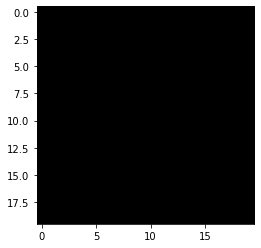

In [423]:
plt.imshow(fake_images[0])